In [1]:
import GetDataUtil
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
GetDataUtil.saveDataToNP("DataSet/trim")

正在生成文件，请稍后...
加速
匀速
右转
左转
碰撞
静止
生成文件完毕！


In [4]:
data = GetDataUtil.interpolation(np.load("DataSet.npy"))

正在生成转换文件，请稍后...
转换完毕，已生成文件JustifiedData.npy


In [2]:
X_train, X_test, y_train, y_test = GetDataUtil.getTrainTestSet()

In [3]:
# 数据预处理
X_train = preprocessing.scale(X_train.reshape(-1,1800))
X_test = preprocessing.scale(X_test.reshape(-1,1800))

In [6]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
# np.array(y_pred)
print(y_pred)
print(y_pred.shape)
print(y_test.shape)
# print( np.array(y_pred) == np.array(y_test) )

# print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0],(y_test != y_pred).sum()))
print(classification_report(y_test, y_pred))

[2 4 1 3 1 2 1 1 2 2 2 1 1 2 1 1 2 1 1 2 2 1 3 3 2 2 4 2 2 2 2 3 2 5 4 2 2
 3 2 1 5 2 2 2 2]
(45,)
(45,)
             precision    recall  f1-score   support

          1       0.75      1.00      0.86         9
          2       1.00      1.00      1.00        23
          3       1.00      0.62      0.77         8
          4       1.00      1.00      1.00         3
          5       1.00      1.00      1.00         2

avg / total       0.95      0.93      0.93        45



In [9]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.90      1.00      0.95         9
          2       0.00      0.00      0.00        23
          3       0.31      1.00      0.47         8
          4       1.00      1.00      1.00         3
          5       1.00      1.00      1.00         2
          6       0.00      0.00      0.00         0

avg / total       0.35      0.49      0.38        45



C:\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [3]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(X_train, y_train)
SVM_labels = SVM.predict(X_test.reshape(-1,1800))
print(classification_report(y_test, SVM_labels))
# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
#     max_iter=-1, probability=False, random_state=None, shrinking=True,
#     tol=0.001, verbose=False)

             precision    recall  f1-score   support

          1       0.00      0.00      0.00         9
          2       0.51      1.00      0.68        23
          3       0.00      0.00      0.00         8
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         2

avg / total       0.26      0.51      0.35        45



C:\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [5]:
print(X_train.shape)

(399, 1800)


In [1]:
import numpy as np
from scipy import interpolate 
import matplotlib.pyplot as plt
import sklearn

In [32]:
originData = np.load("DataSet.npy")

In [33]:
originData.shape

(444,)

In [5]:
plt.figure()
plt.plot(range(len(originData[0]["Acc"][0])),originData[0]["Acc"][0])

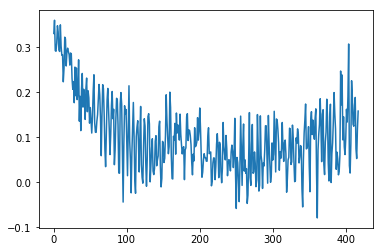

In [6]:
plt.show()

In [34]:
'''
sample 为插值后的采样点数
kind 为插值方式
    #"nearest","zero"为阶梯插值  
    #slinear 线性插值  
    #"quadratic","cubic" 为2阶、3阶B样条曲线插值
savaPath 为数据保存路径
'''
def interpolation(originData,sample = 300,kind ="cubic",savePath="JustifiedData.npy"):
    JutifiedDataSet = []
    for data in originData:
        F_Acc = interpolate.interp1d(range(0,len(data["Acc"][0])),data["Acc"],axis = 1,kind = kind)
        F_Gyr = interpolate.interp1d(range(0,len(data["Gyr"][0])),data["Gyr"],axis = 1,kind = kind)
        X_new =np.linspace(0,len(data["Acc"][0])-1,sample)
        Acc_New=F_Acc(X_new)
        Gyr_New=F_Gyr(X_new)
        JutifiedDataSet.append({"Acc":Acc_New,"Gyr":Gyr_New,"Label":data["Label"]})
    np_JutifiedDataSet = np.array(JutifiedDataSet)
    np.save(savePath,np_JutifiedDataSet)
    return np_JutifiedDataSet

In [35]:
JutifiedDataSet = interpolation(originData)
print(JutifiedDataSet.shape)

(444,)


In [87]:
# train_test_split(train_data,train_target,test_size=0.4, random_state=0)
'''
载入文件插值、对齐好的数据文件，并返回训练集、测试集
参数：
    dataPath 数据文件地址
    test_size 测试集占比
输出：
    X_train,X_test, y_train, y_test
'''
from sklearn.cross_validation import train_test_split
def getTrainTestSet(dataPath = "JustifiedData.npy",test_size = 0.1):
    X = []
    Y = []
    dataSet = np.load(dataPath)
    for data in dataSet:
        S = data["Acc"]
        S = np.stack((S,data["Gyr"]),axis = 0)
        S = S.reshape((6,300))
        X.append(S)
        Y.append(data["Label"])
#     print(np.array(X).shape)
#     print(np.array(Y).shape)
    X = np.array(X)
    Y = np.array(Y)
#     X_train,X_test, y_train, y_test
    return train_test_split(X,Y,test_size = test_size,random_state = 0)

    
    
X_train,X_test,y_train,y_test = getTrainTestSet()
print(X_train.shape)
    
    

(399, 6, 300)


In [60]:
X = np.array([1,2,3,4,3])
list = [5][]
list[0].append(X)
# X[0] = np.stack(X[0],np.random.rand((3,6)),axis = 1)
# X[0] = 0
# X.shape

SyntaxError: invalid syntax (<ipython-input-60-3e26879a45ff>, line 2)

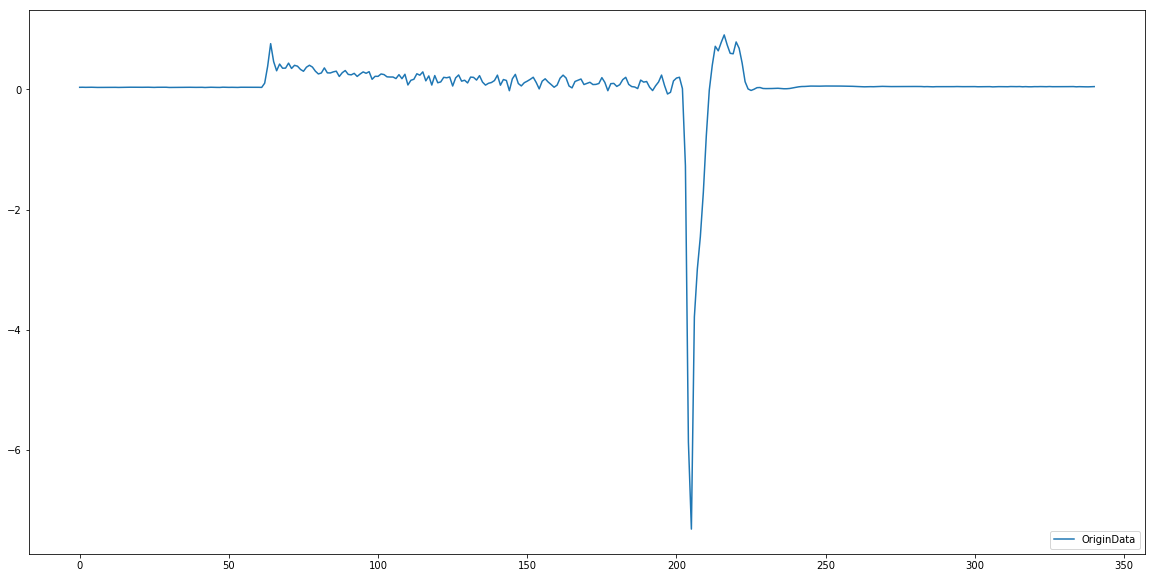

3


In [31]:
def  interpolation(originData,sample = 300,kind ="quadratic",savePath="JustifiedData.npy")：
sample = 300  #3s
plt.figure("qc3",figsize=(20,10))
for kind in ["quadratic","cubic"]:#插值方式  
    #"nearest","zero"为阶梯插值  
    #slinear 线性插值  
    #"quadratic","cubic" 为2阶、3阶B样条曲线插值  
    f = interpolate.interp1d(range(len(originData[401]["Acc"][0])),originData[401]["Acc"][0],kind = kind)
    # ‘slinear’, ‘quadratic’ and ‘cubic’ refer to a spline interpolation of first, second or third order)  
    x_new =np.linspace(0,len(originData[401]["Acc"][0])-1,sample)
    ynew=f(x_new)
    
#     plt.plot(x_new,ynew,label=str(kind))
    
plt.plot(range(len(originData[401]["Acc"][0])),originData[401]["Acc"][0],label = "OriginData")
plt.legend(loc="lower right")  
plt.show()  
print(originData[401]["Label"])

In [15]:
xnew =np.linspace(0,len(originData[0]["Acc"][0]),300)#3s
print(xnew)

[   0.            1.39799331    2.79598662    4.19397993    5.59197324
    6.98996656    8.38795987    9.78595318   11.18394649   12.5819398
   13.97993311   15.37792642   16.77591973   18.17391304   19.57190635
   20.96989967   22.36789298   23.76588629   25.1638796    26.56187291
   27.95986622   29.35785953   30.75585284   32.15384615   33.55183946
   34.94983278   36.34782609   37.7458194    39.14381271   40.54180602
   41.93979933   43.33779264   44.73578595   46.13377926   47.53177258
   48.92976589   50.3277592    51.72575251   53.12374582   54.52173913
   55.91973244   57.31772575   58.71571906   60.11371237   61.51170569
   62.909699     64.30769231   65.70568562   67.10367893   68.50167224
   69.89966555   71.29765886   72.69565217   74.09364548   75.4916388
   76.88963211   78.28762542   79.68561873   81.08361204   82.48160535
   83.87959866   85.27759197   86.67558528   88.0735786    89.47157191
   90.86956522   92.26755853   93.66555184   95.06354515   96.46153846
   97.85